In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [34]:
def downward_recursion(M,x):
    J = np.zeros(M+1)
    J[M] = 0
    J[M-1] = 1
    for l in range(M-1,0,-1):
        J[l-1] = (2*l+1)/x*J[l] - J[l+1]
    const = J[0]/(np.sin(x)/x)
    J = J/const
    return J

def upward_recursion(M,x):
    J = np.zeros(M+1)
    J[0] = np.sin(x)/x
    J[1] = np.sin(x)/x**2 - np.cos(x)/x
    for l in range(1,M):
        J[l+1] = (2*l+1)/x*J[l] - J[l-1]
    
    return J

def test_J_scipy(M,x):
    J =  [sp.spherical_jn(n,x) for n in range(M+1)]
    return J

print("test accuracy of downward recursion")
M = 20
x = 0.1
J_down = downward_recursion(M,x)
J_up = upward_recursion(M,x)
J_scipy = test_J_scipy(M,x)
print("----|scipy - downward|----"+"\n",np.abs(J_down-J_scipy))
print("----|scipy - upwnward|----"+"\n",np.abs(J_up-J_scipy))

test accuracy of downward recursion
----|scipy - downward|----
 [0.00000000e+00 4.85722573e-17 7.58941521e-19 1.35525272e-20
 3.30872245e-22 4.13590306e-25 3.23117427e-27 8.83524214e-29
 4.43734259e-31 3.46667390e-33 3.61111865e-35 1.76324153e-38
 5.96930725e-40 3.22859166e-42 2.45227231e-45 4.51590325e-47
 4.00914707e-50 4.22839730e-52 5.28468096e-51 1.95516543e-48
 7.62509231e-46]
----|scipy - upwnward|----
 [0.00000000e+00 1.67921232e-15 4.90031193e-14 2.44848785e-12
 1.71345146e-10 1.54186146e-08 1.69587626e-06 2.20448496e-04
 3.30655785e-02 5.62092789e+00 1.06794323e+03 2.24262458e+05
 5.15792975e+07 1.28946001e+10 3.48149045e+12 1.00961934e+15
 3.12978513e+17 1.03281900e+20 3.61483519e+22 1.33747869e+25
 5.21613074e+27]


In [75]:
def derivative_J(M,x):
    J = downward_recursion(M,x)
    dJ = np.zeros(M+1)
    for l in range(1,M+1):
        dJ[l] = J[l-1] - (l+1)/x*J[l]
    dJ[0] = -J[1] #from the second recursion relation in 1.20
    return dJ
def test_dJ_scipy(M,x):
    dJ = [sp.spherical_jn(n,x,derivative=True) for n in range(M+1)]
    return dJ
print("test accuracy of derivative of J")
M = 10
x = 0.1
dJ = derivative_J(M,x)
dJ_scipy = test_dJ_scipy(M,x)
print(dJ_scipy[0])
print("----|scipy - downward|----"+"\n",np.abs(dJ-dJ_scipy))
print(dJ)
print(dJ_scipy)

test accuracy of derivative of J
-0.033300011902557616
----|scipy - downward|----
 [4.85722573e-17 8.88178420e-16 3.12250226e-17 1.08420217e-19
 1.69406589e-21 2.97785021e-22 7.23783036e-25 1.31670351e-25
 2.02610467e-23 3.82700441e-21 7.99827937e-19]
[-3.33000119e-02  3.32333928e-01  1.33142936e-02  2.85449820e-04
  4.22991897e-06  4.80741536e-08  4.43803147e-10  3.45203111e-12
  2.32080739e-14  1.37425268e-16  1.52694742e-18]
[-0.033300011902557616, 0.3323339284171293, 0.013314293649190536, 0.0002854498196109462, 4.2299189698162e-06, 4.8074153623488945e-08, 4.438031467405058e-10, 3.4520311130021172e-12, 2.3208073834548078e-14, 1.3742144090353713e-16, 7.271194838563152e-19]


In [201]:
def newton_raphson(l,x_0,max_steps=500):
    M = 13
    x = x_0
    for step in range(max_steps):
        x_old = x
        x = x_old - test_J_scipy(M,x)[l]/test_dJ_scipy(M,x)[l]
        if np.abs(x-x_old) < 1e-10:
            return x
    pass
    

def bessel_roots(l_max,n_roots):
    roots = np.zeros((l_max+1,n_roots))
    x_start = 1
    for n in range(n_roots):
        for l in range(0,l_max+1):
            if n == 0 and l == 0:
                x_start = 1
            else:
                x_start = roots[l-1,n] 
            roots[l,n] = newton_raphson(l,x_start)
    return roots

def bessel_roots(l_max, n_roots):
    roots = np.zeros((l_max+1,n_roots))
    x_start = 1
    n = 0
    for n in range(n_roots):
        for l in range(0,l_max):
            if n == 0 and l == 0:
                x_start = 1
            elif l > 0 and n > 0:
                x_start = roots[l+1,n-1]
                print(x_start)
            else: 
                x_start = roots[l-1,n]
            roots[l,n] = newton_raphson(l,x_start)
    return roots
def test_roots_scipy(l_max,n_roots):
    roots = np.zeros((l_max+1,n_roots))
    for l in range(l_max+1):
        roots[l,:] = sp.jn_zeros(l,n_roots)
    return roots
print(bessel_roots(4,3))



5.76345919689455
6.98793200050052
0.0
18.689036355362823
nan
0.0
[[3.14159265e+00            nan            nan]
 [4.49340946e+00 6.31088724e-29            nan]
 [5.76345920e+00 1.86890364e+01            nan]
 [6.98793200e+00            nan            nan]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


/tmp/ipykernel_4651/2156587299.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  x = x_old - test_J_scipy(M,x)[l]/test_dJ_scipy(M,x)[l]
/tmp/ipykernel_4651/2156587299.py:6: RuntimeWarning: invalid value encountered in scalar divide
  x = x_old - test_J_scipy(M,x)[l]/test_dJ_scipy(M,x)[l]


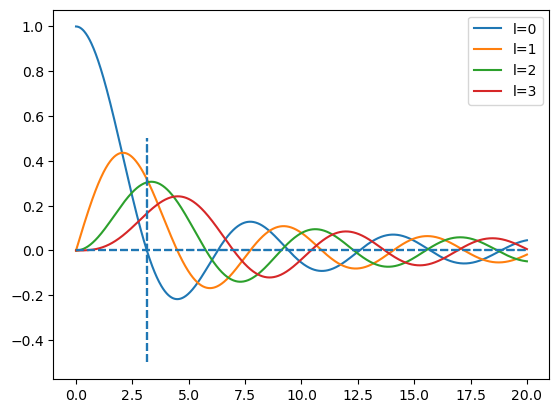

In [191]:
# plot 20 bessel functions
x = np.linspace(0,20,1000)
for l in range(4):
    plt.plot(x,sp.spherical_jn(l,x),label="l="+str(l))
    plt.vlines(np.pi,-0.5,0.5,linestyles="dashed")
    plt.hlines(0,0,20,linestyles="dashed")
    plt.legend()
